## What's Cooking dataset

In [1]:
import os
import json
import pickle
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import logging
logging.captureWarnings(True)

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from GpLSI.utils import *
from utils import *

root_path = os.path.join(parent_dir, "data/whats-cooking")
dataset_root = os.path.join(root_path, "dataset")
model_root = os.path.join(root_path, "model")
path_to_data = os.path.join(dataset_root, 'train.json')

with open(path_to_data) as data_file:    
    data = json.load(data_file)

with open(os.path.join(dataset_root, 'ingredient_mapping.pkl'), 'rb') as f:
    ingredient_mapping = pickle.load(f)

with open(os.path.join(dataset_root, 'neighbor_countries_mapping.pkl'), 'rb') as f:
    neighbor_countries_mapping = pickle.load(f)

filename = os.path.join(dataset_root, 'processed_edge_df.pkl')
with open(filename, 'rb') as f:
    edge_df = pickle.load(f)

filename = os.path.join(dataset_root, 'processed_ingredient_df.pkl')
with open(filename, 'rb') as f:
    ingredient_df = pickle.load(f)

cuisine_order = ['british','irish', 'french', 'greek','italian', 'russian',
                 'moroccan', 'spanish', 'cajun_creole', 'brazilian', 'jamaican', 'southern_us', 'mexican',
                'korean', 'chinese','japanese', 'filipino', 'indian', 'thai','vietnamese']

cuisine_to_group = {
    'british': 'Western European',
    'irish': 'Western European',
    'french': 'Western European',
    'italian': 'Western European',
    'spanish': 'Western European',
    'greek': 'Western European',
    'russian': 'Western European',
    'cajun_creole': 'American/Caribbean',
    'southern_us': 'American/Caribbean',
    'brazilian': 'American/Caribbean',
    'jamaican': 'American/Caribbean',
    'mexican': 'American/Caribbean',
    'moroccan': 'Middle Eastern/North African',
    'chinese': 'East Asian',
    'japanese': 'East Asian',
    'korean': 'East Asian',
    'filipino': 'East Asian',
    'indian': 'South Asian/Southeast Asian',
    'thai': 'South Asian/Southeast Asian',
    'vietnamese': 'South Asian/Southeast Asian'
}

### A. Align topics and save results

In [3]:
ntopics = 7
file_path = os.path.join(model_root, f'cooking_model_results_{ntopics}.pkl')
W_gplsi, W_plsi, W_lda, A_gplsi, A_plsi, A_lda = align_everything(file_path, ntopics)
top_df, anchor_df = get_topics(A_gplsi, ntopics, 'gplsi')
top_df, anchor_df = get_topics(A_plsi, ntopics, 'plsi')
top_df, anchor_df = get_topics(A_lda, ntopics, 'lda')

### B. Get classification score using XGBoost

In [4]:
results = []
y_pred, acc_gplsi = rf_classifier(W_gplsi)
y_pred, acc_plsi = rf_classifier(W_plsi)
y_pred, acc_lda = rf_classifier(W_lda)
results.append({
    'ntopics': ntopics,
    'acc_gplsi': acc_gplsi,
    'acc_plsi': acc_plsi,
    'acc_lda': acc_lda
})
results = pd.DataFrame(results)
print(results)

Best Parameters: {'max_depth': 10, 'n_estimators': 500}
Best CV Accuracy: 0.6569295164203359
Test Accuracy: 0.6745098039215687
Best Parameters: {'max_depth': 10, 'n_estimators': 500}
Best CV Accuracy: 0.65062533946842
Test Accuracy: 0.6507352941176471
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Best CV Accuracy: 0.682569041804846
Test Accuracy: 0.6872549019607843
   ntopics  acc_gplsi  acc_plsi   acc_lda
0        7    0.67451  0.650735  0.687255


### C. Plot proportion of topic-by-cuisine

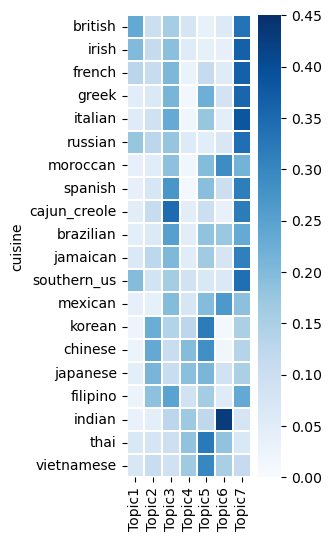

In [5]:
plot_topic_by_cuisine(W_gplsi)

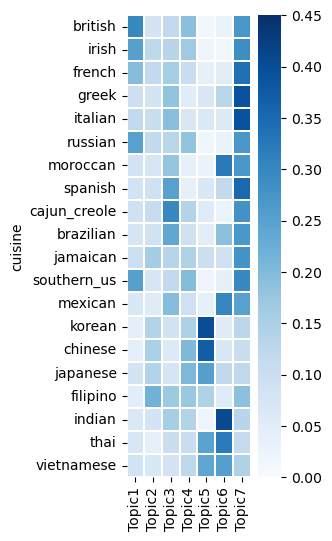

In [6]:
plot_topic_by_cuisine(W_plsi)

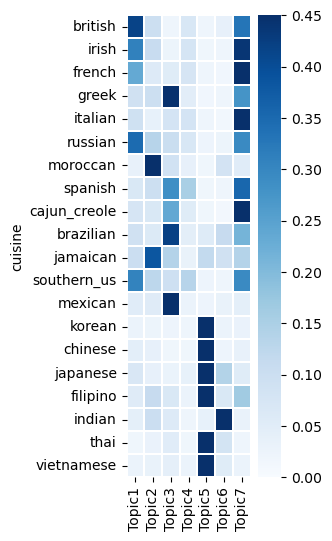

In [7]:
plot_topic_by_cuisine(W_lda)